In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# analysis

In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df['age'][df['age'] == 0].count()

0

In [15]:
for i in ['age', 'bmi', 'charges']:
    print(i, df[i][df[i] == 0].count())

age 0
bmi 0
charges 0


In [19]:
for i in ['sex', 'smoker', 'region']:
    print(i, sorted(df[i].unique()))

sex ['female', 'male']
smoker ['no', 'yes']
region ['northeast', 'northwest', 'southeast', 'southwest']


# Feature Eng

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [21]:
for i in ['sex', 'smoker', 'region']:
    df[i] = lb.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:>

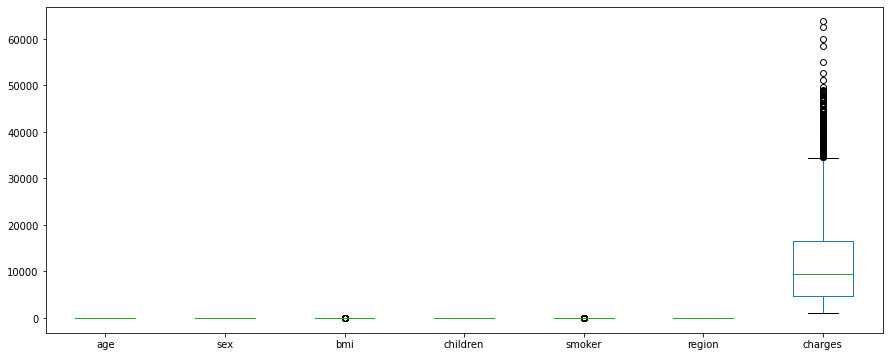

In [27]:
df.plot(kind='box', figsize=(15, 6))

In [30]:
df['age'][df['charges'] >= 40000].unique()

array([28, 60, 58, 57, 64, 63, 46, 36, 54, 50, 56, 59, 25, 43, 45, 61, 55,
       44, 48, 31, 34, 47, 37, 40, 62, 39, 41, 51, 30, 29, 53, 33, 22, 38,
       23, 52, 42], dtype=int64)

In [28]:
df[['age','charges']][df['charges'] >= 35000]

,age,charges
14,27,39611.75770
19,30,36837.46700
23,34,37701.87680
29,31,38711.00000
30,22,35585.57600
...,...,...
1300,45,62592.87309
1301,62,46718.16325
1303,43,37829.72420
1313,19,36397.57600


# Feature Selection

In [33]:
X = df.drop('charges', axis=1)
y = df['charges']

In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [35]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg_model = LinearRegression()

In [40]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [41]:
reg_model.score(x_train, y_train)

0.7606696248102665

In [42]:
reg_model.score(x_test, y_test)

0.6998520050469028

In [43]:
y_pred = reg_model.predict(x_train)

C:\Users\PC\.conda\envs\batchsixenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

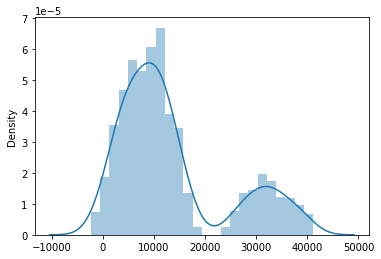

In [44]:
sns.distplot(y_pred)

In [45]:
# 19	0	27.900	0	1	3	16884.92400
reg_model.predict([[19,0,27.900,0,1,3]])

array([25582.49207997])

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV

In [54]:
lass_cv = LassoCV(alphas=None, cv=100, max_iter=100000, normalize=True)
lass_cv.fit(x_train, y_train)

LassoCV(cv=100, max_iter=100000, normalize=True)

In [55]:
alpha = lass_cv.alpha_

In [56]:
alpha

0.2998133044209736

In [57]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.2998133044209736)

In [58]:
lasso_reg.score(x_test, y_test)

0.6998547214090706